* Fear199: LAI
* Control258: LAI
* Aut1367: RPS

In [2]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import cv2

import plotly
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
plotly.offline.init_notebook_mode()

import time

import ast

# from ndreg import *
# import ndio.remote.neurodata as neurodata
import nibabel as nib
import networkx as nx
import re
import pandas as pd

In [79]:
a = np.array([1,2,3,4,5])
print(a)

start = time.time()
astr = np.array2string(a, separator=',')
run_time = time.time() - start
print('run time: %f s' % run_time)
print(type(astr))
print(astr)

[1 2 3 4 5]
run time: 0.001006 s
<type 'str'>
[1,2,3,4,5]


In [77]:
a = np.array([1,2,3,4,5])
print(a)

start = time.time()
astr = str(list(a))
run_time = time.time() - start
print('run time: %f s' % run_time)
print(type(astr))
print(astr)

[1 2 3 4 5]
run time: 0.000122 s
<type 'str'>
[1, 2, 3, 4, 5]


In [78]:
a = np.array([1,2,3,4,5])
print(a)

start = time.time()

str_list = []
for num in a:
    str_list.append(`num`)
s = ','.join(str_list)
astr = '['
astr += s
astr += ']'

run_time = time.time() - start
print('run time: %f s' % run_time)
print(type(astr))
print(astr)

[1 2 3 4 5]
run time: 0.000338 s
<type 'str'>
[1,2,3,4,5]


In [26]:
# String of a list to a list
a = "[0, 1, 2]"
print(a)

start = time.time()
astr = ast.literal_eval(a)
run_time = time.time() - start
print('run time: %f s' % run_time)
print(type(astr))
print(astr)

[0, 1, 2]
run time: 0.000128 s
<type 'list'>
[0, 1, 2]


In [30]:
# String of a list to a list
x = 0
y = 1
z = 2
print(a)

start = time.time()
astr = []
astr.append(x)
astr.append(y)
astr.append(z)
run_time = time.time() - start
print('run time: %f s' % run_time)
print(type(astr))
print(astr)

[0, 1, 2]
run time: 0.000158 s
<type 'list'>
[0, 1, 2]


In [3]:
def time_function(fun, *args):
    start = time.time()
    result = fun(*args)
    run_time = time.time() - start
    print('run time: %f s' % run_time)
    return result

In [4]:
def plot_hist(im, title=''):
    hist,bins = np.histogram(im.flatten(),256,[0,256])

    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()

    plt.plot(cdf_normalized, color = 'b')
    plt.hist(im.flatten(),256,[0,256], color = 'r')
    plt.title(title)
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.show()

In [5]:
def img_copy(img):
    """
    Returns a copy of the input image
    """
    return sitk.Image(img)

In [6]:
def thresh(im, val):
    """Thresholding the image s.t. any pixel with intensity less than val is set to 0, and
    and pixel with intensity above is set to 255. 
    """
    im_t = np.copy(im)

    for x in range(im.shape[0]):
        for y in range(im.shape[1]):
            for z in range(im.shape[2]):
                if im[x, y, z] < val:
                    im_t[x, y, z] = 0
                else:
                    im_t[x, y, z] = 255
                    
    return im_t

In [7]:
def thresh_cdf(im, percentile):
    im_t = np.copy(im)
    
    (values, bins) = np.histogram(im_t, bins=1000)
    cumValues = np.cumsum(values).astype(float)
    cumValues = (cumValues - cumValues.min()) / cumValues.ptp()
    
    maxIndex = np.argmax(cumValues>percentile)-1
    threshold = bins[maxIndex]
    print(threshold)

    result = thresh(im_t, threshold)
                    
    return result

In [7]:
print(gr.nodes())

gr.add_node(2)
print(gr.nodes()[0][1])
    
print('nodes')
for n in gr.nodes():
    print n
    
gr.add_edge(2, 'asdf')
for e in gr.edges():
    print e

NameError: name 'gr' is not defined

In [75]:
num = nx.number_of_nodes(fear199_graph)
positions = pd.DataFrame(columns=['x', 'y', 'z'], index=range(num))


In [87]:
print(fear199_graph.nodes())

[(52, 332), (91, 238), (54, 278), (280, 261), (152, 282), (209, 287), (119, 308), (194, 237), (195, 348), (214, 232), (52, 243), (114, 404), (132, 331), (81, 357), (100, 199), (137, 91), (199, 269), (204, 101), (239, 115), (155, 363), (265, 511), (85, 230), (213, 401), (90, 332), (218, 313), (126, 272), (203, 167), (41, 256), (114, 374), (191, 462), (51, 347), (131, 275), (188, 320), (99, 103), (62, 377), (155, 393), (193, 254), (194, 337), (51, 200), (94, 174), (169, 117), (99, 244), (225, 33), (127, 290), (112, 121), (203, 274), (95, 256), (197, 304), (108, 141), (221, 426), (121, 110), (212, 147), (175, 265), (144, 211), (112, 295), (187, 343), (154, 20), (121, 223), (201, 456), (70, 224), (292, 186), (64, 265), (121, 328), (178, 257), (254, 492), (257, 182), (83, 132), (196, 429), (162, 269), (77, 414), (150, 298), (101, 488), (229, 291), (253, 189), (92, 253), (129, 109), (186, 118), (150, 389), (263, 158), (157, 439), (105, 126), (286, 197), (215, 225), (200, 134), (96, 343), (14

In [88]:
print(fear199_graph.nodes()[0])

(52, 332)


In [76]:
print(positions)


        x    y    z
0     NaN  NaN  NaN
1     NaN  NaN  NaN
2     NaN  NaN  NaN
3     NaN  NaN  NaN
4     NaN  NaN  NaN
5     NaN  NaN  NaN
6     NaN  NaN  NaN
7     NaN  NaN  NaN
8     NaN  NaN  NaN
9     NaN  NaN  NaN
10    NaN  NaN  NaN
11    NaN  NaN  NaN
12    NaN  NaN  NaN
13    NaN  NaN  NaN
14    NaN  NaN  NaN
15    NaN  NaN  NaN
16    NaN  NaN  NaN
17    NaN  NaN  NaN
18    NaN  NaN  NaN
19    NaN  NaN  NaN
20    NaN  NaN  NaN
21    NaN  NaN  NaN
22    NaN  NaN  NaN
23    NaN  NaN  NaN
24    NaN  NaN  NaN
25    NaN  NaN  NaN
26    NaN  NaN  NaN
27    NaN  NaN  NaN
28    NaN  NaN  NaN
29    NaN  NaN  NaN
...   ...  ...  ...
9365  NaN  NaN  NaN
9366  NaN  NaN  NaN
9367  NaN  NaN  NaN
9368  NaN  NaN  NaN
9369  NaN  NaN  NaN
9370  NaN  NaN  NaN
9371  NaN  NaN  NaN
9372  NaN  NaN  NaN
9373  NaN  NaN  NaN
9374  NaN  NaN  NaN
9375  NaN  NaN  NaN
9376  NaN  NaN  NaN
9377  NaN  NaN  NaN
9378  NaN  NaN  NaN
9379  NaN  NaN  NaN
9380  NaN  NaN  NaN
9381  NaN  NaN  NaN
9382  NaN  NaN  NaN


In [81]:
positions.loc[0] = [1, 1, 1]
print(positions)

        x    y    z
0       1    1    1
1     NaN  NaN  NaN
2     NaN  NaN  NaN
3     NaN  NaN  NaN
4     NaN  NaN  NaN
5     NaN  NaN  NaN
6     NaN  NaN  NaN
7     NaN  NaN  NaN
8     NaN  NaN  NaN
9     NaN  NaN  NaN
10    NaN  NaN  NaN
11    NaN  NaN  NaN
12    NaN  NaN  NaN
13    NaN  NaN  NaN
14    NaN  NaN  NaN
15    NaN  NaN  NaN
16    NaN  NaN  NaN
17    NaN  NaN  NaN
18    NaN  NaN  NaN
19    NaN  NaN  NaN
20    NaN  NaN  NaN
21    NaN  NaN  NaN
22    NaN  NaN  NaN
23    NaN  NaN  NaN
24    NaN  NaN  NaN
25    NaN  NaN  NaN
26    NaN  NaN  NaN
27    NaN  NaN  NaN
28    NaN  NaN  NaN
29    NaN  NaN  NaN
...   ...  ...  ...
9365  NaN  NaN  NaN
9366  NaN  NaN  NaN
9367  NaN  NaN  NaN
9368  NaN  NaN  NaN
9369  NaN  NaN  NaN
9370  NaN  NaN  NaN
9371  NaN  NaN  NaN
9372  NaN  NaN  NaN
9373  NaN  NaN  NaN
9374  NaN  NaN  NaN
9375  NaN  NaN  NaN
9376  NaN  NaN  NaN
9377  NaN  NaN  NaN
9378  NaN  NaN  NaN
9379  NaN  NaN  NaN
9380  NaN  NaN  NaN
9381  NaN  NaN  NaN
9382  NaN  NaN  NaN


In [72]:
def plot_graphml3d_old(g):
    # grab the node positions from the graphML file
    V = nx.number_of_nodes(g)
#     attributes = nx.get_node_attributes(g, 'coord')
    nodes = g.nodes()
    node_positions_3d = pd.DataFrame(columns=['x', 'y', 'z'], index=range(V))
    for n in g.nodes_iter():
#         node_positions_3d.loc[n] = [int((re.findall('\d+', str(attributes[n])))[0]),
#                                     int((re.findall('\d+', str(attributes[n])))[1]),
#                                     int((re.findall('\d+', str(attributes[n])))[2])]
        node_positions_3d.loc[n] = [int(n[0]), int(n[1]), int(n[2])]

    # grab edge endpoints
    edge_x = []
    edge_y = []
    edge_z = []

    for e in g.edges_iter():
        # strippedSource = int(e[0].replace('s', ''))
        # strippedTarget = int(e[1].replace('s', ''))
        source_pos = node_positions_3d.loc[e[0]]
        target_pos = node_positions_3d.loc[e[1]]

        edge_x += [source_pos['x'], target_pos['x'], None]
        edge_y += [source_pos['y'], target_pos['y'], None]
        edge_z += [source_pos['z'], target_pos['z'], None]


    # node style
    node_trace = Scatter3d(x=[x for x in node_positions_3d['x']],
                           y=[x for x in node_positions_3d['y']],
                           z=[x for x in node_positions_3d['z']],
                           mode='markers',
                           # name='regions',
                           marker=Marker(symbol='dot',
                                         size=6,
                                         opacity=0.5,
                                         color='purple'),
                           # text=[str(r) for r in range(V)],
                           # text=atlas_data['nodes'],
                           hoverinfo='text')

    # edge style
    edge_trace = Scatter3d(x=edge_x,
                           y=edge_y,
                           z=edge_z,
                           mode='lines',
                           line=Line(color='cyan', width=1),
                           hoverinfo='none')

    # axis style
    axis = dict(showbackground=False,
                showline=False,
                zeroline=False,
                showgrid=False,
                showticklabels=False)

    plot_title = 'graphml plot'
    # overall layout
    layout = Layout(title=plot_title,
                    width=800,
                    height=900,
                    showlegend=False,
                    scene=Scene(xaxis=XAxis(axis),
                                yaxis=YAxis(axis),
                                zaxis=ZAxis(axis)),
                    margin=Margin(t=50),
                    hovermode='closest',
                    paper_bgcolor='rgba(0,0,0,0)',
                    plot_bgcolor='rgb(255,255,255)')

    data = Data([node_trace, edge_trace])
    fig = Figure(data=data, layout=layout)
    iplot(fig, validate=False)

In [99]:
def plot_graphml3d(g, show=False, output_path=None):
    """
    Plotting networkx graph.  output_path should end in '.html'.
    """
    # grab the node positions from the graphML file
    V = nx.number_of_nodes(g)
#     attributes = nx.get_node_attributes(g, 'coord')
    nodes = g.nodes()
    node_positions_3d = pd.DataFrame(columns=['x', 'y', 'z'], index=range(V))
    for i, n in enumerate(nodes):
        node_positions_3d.loc[i] = [int(n[0]), int(n[1]), int(n[2])]    


    # grab edge endpoints
    edge_x = []
    edge_y = []
    edge_z = []
    
    for e in g.edges():
        # Changing tuple to list
        source_pos = list(e[0])
        target_pos = list(e[1])

        edge_x += [source_pos[0], target_pos[0], None]
        edge_y += [source_pos[1], target_pos[1], None]
        edge_z += [source_pos[2], target_pos[2], None]

    # node style
    node_trace = Scatter3d(x=[x for x in node_positions_3d['x']],
                           y=[x for x in node_positions_3d['y']],
                           z=[x for x in node_positions_3d['z']],
                           mode='markers',
                           # name='regions',
                           marker=Marker(symbol='dot',
                                         size=6,
                                         opacity=0.5,
                                         color='purple'),
                           # text=[str(r) for r in range(V)],
                           # text=atlas_data['nodes'],
                           hoverinfo='text')

    # edge style
    edge_trace = Scatter3d(x=edge_x,
                           y=edge_y,
                           z=edge_z,
                           mode='lines',
                           line=Line(color='cyan', width=1),
                           hoverinfo='none')

    # axis style
    axis = dict(showbackground=False,
                showline=False,
                zeroline=False,
                showgrid=False,
                showticklabels=False)

    plot_title = 'graphml plot'
    # overall layout
    layout = Layout(title=plot_title,
                    width=800,
                    height=900,
                    showlegend=False,
                    scene=Scene(xaxis=XAxis(axis),
                                yaxis=YAxis(axis),
                                zaxis=ZAxis(axis)),
                    margin=Margin(t=50),
                    hovermode='closest',
                    paper_bgcolor='rgba(0,0,0,0)',
                    plot_bgcolor='rgb(255,255,255)')

    data = Data([node_trace, edge_trace])
    fig = Figure(data=data, layout=layout)
    if show:
        iplot(fig, validate=False)
    
    if output_path != None:
        plotly.offline.plot(fig, filename=output_path)

## Real Data

In [2]:
%matplotlib inline
from ndreg import *
import matplotlib
import ndio.remote.neurodata as neurodata
import numpy as np
import cv2
import nibabel as nib

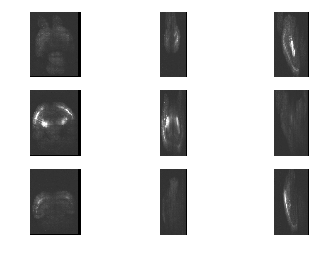

NameError: name 'img_copy' is not defined

In [3]:
inToken = "Fear199"

inImg = imgDownload(inToken, resolution=5)
imgShow(inImg, vmax=500)

inImg_backup = img_copy(inImg)

refToken = "ara_ccf2"
refImg = imgDownload(refToken)
# imgShow(refImg, vmax=500)

In [ ]:
inImg = img_copy(inImg_backup)
imgShow(inImg, vmax=500)

In [ ]:
refAnnoImg = imgDownload(refToken, channel="annotation")
imgShow(refAnnoImg, vmax=1000)

In [ ]:
print(refImg.GetSpacing())
print(inImg.GetSpacing())

# Respacing according to the reference image
inImg = imgResample(inImg, spacing=refImg.GetSpacing())
imgShow(inImg, vmax=500)

# Reorienting
inImg = imgReorient(inImg, "LAI", "RSA")
imgShow(inImg, vmax=500)

# Thresholding
(values, bins) = np.histogram(sitk.GetArrayFromImage(inImg), bins=100, range=(0,500))
plt.plot(bins[:-1], values)

counts = np.bincount(values)
maximum = np.argmax(bins)
print(maximum)
# print(counts)

lowerThreshold = maximum
upperThreshold = sitk.GetArrayFromImage(inImg).max()+1

print(lowerThreshold)
print(upperThreshold)


# 3, 2, 1
inImg = sitk.Threshold(inImg,lowerThreshold,upperThreshold,lowerThreshold) - lowerThreshold
imgShow(inImg, vmax = 500)

(values, bins) = np.histogram(sitk.GetArrayFromImage(inImg), bins=100, range=(0,500))
plt.plot(bins[:-1], values)

imgShow(inImg, vmax=500)

# # Saving image
# location = "img/" + 'Fear199' + "_thresh.nii"
# imgWrite(inImg, str(location))

In [ ]:
# Generating CLARITY mask
(values, bins) = np.histogram(sitk.GetArrayFromImage(inImg), bins=1000)
cumValues = np.cumsum(values).astype(float)
cumValues = (cumValues - cumValues.min()) / cumValues.ptp()

maxIndex = np.argmax(cumValues>0.95)-1
threshold = bins[maxIndex]
print(threshold)

inMask = sitk.BinaryThreshold(inImg, 0, threshold, 1, 0)
imgShow(inMask)

imgShow(imgMask(inImg,inMask))

## Affine transformation

In [ ]:
spacing=[0.25,0.25,0.25]
refImg_ds = imgResample(refImg, spacing=spacing)
imgShow(refImg_ds, vmax=500)

inImg_ds = imgResample(inImg, spacing=spacing)
imgShow(inImg_ds, vmax=500)


inMask_ds = imgResample(inMask, spacing=spacing, useNearest=True)
imgShow(inMask_ds)

In [ ]:
affine = imgAffineComposite(inImg_ds, refImg_ds, inMask=inMask_ds, iterations=100, useMI=True, verbose=True)

In [ ]:
inImg_affine = imgApplyAffine(inImg, affine, size=refImg.GetSize())
imgShow(inImg_affine, vmax=500)

inMask_affine = imgApplyAffine(inMask, affine, size=refImg.GetSize(), useNearest=True)
imgShow(inMask_affine)

# LDDMM


Step 0: alpha=0.05, beta=0.05, scale=1.0
	E, E_velocity, E_rate, E_image (E_image %), LearningRate
0.	-1.78342e+10, 48.557, 0, -1.78342e+10 (97.3796%), 1.100000e-03
1.	-1.88336e+10, 146.785, 0, -1.88336e+10 (96.2858%), 1.210000e-03
2.	-2.00771e+10, 351.019, 0, -2.00771e+10 (94.9248%), 1.331000e-03
3.	-2.06717e+10, 603.903, 0, -2.06717e+10 (94.274%), 1.464100e-03
4.	-2.12029e+10, 898.325, 0, -2.12029e+10 (93.6926%), 1.610510e-03
5.	-2.15684e+10, 1054.78, 0, -2.15684e+10 (93.2926%), 8.857805e-04
6.	-2.24277e+10, 1202.72, 0, -2.24277e+10 (92.3521%), 9.743586e-04
7.	-2.271e+10, 1302.83, 0, -2.271e+10 (92.0431%), 5.358972e-04
8.	-2.33845e+10, 1414.23, 0, -2.33845e+10 (91.3049%), 5.894869e-04
9.	-2.3543e+10, 1473.33, 0, -2.3543e+10 (91.1315%), 3.242178e-04
10.	-2.36414e+10, 1535.42, 0, -2.36414e+10 (91.0237%), 3.566396e-04
11.	-2.37674e+10, 1605.15, 0, -2.37674e+10 (90.8859%), 3.923035e-04
12.	-2.38755e+10, 1681.43, 0, -2.38755e+10 (90.7676%), 4.315339e-04
13.	-2.39625e+10, 1762.47, 0, -2.3

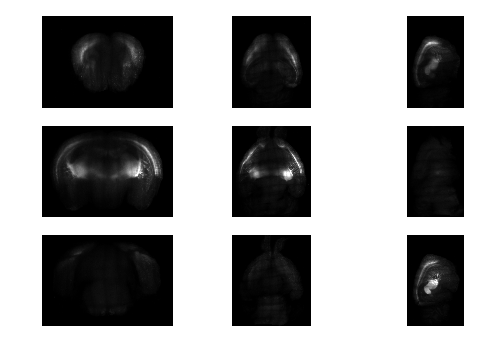

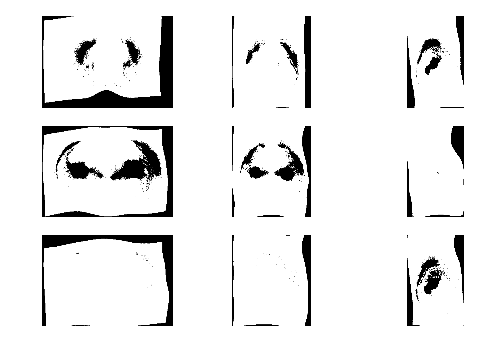

In [34]:
inImg_ds = imgResample(inImg_affine, spacing=spacing)
inMask_ds = imgResample(inMask_affine, spacing=spacing, useNearest=True)
(field, invField) = imgMetamorphosisComposite(inImg_ds, refImg_ds, inMask=inMask_ds, alphaList=[0.05, 0.02, 0.01], useMI=True, iterations=100, verbose=True)
inImg_lddmm = imgApplyField(inImg_affine, field, size=refImg.GetSize())
inMask_lddmm = imgApplyField(inMask_affine, field, size=refImg.GetSize(), useNearest=True)
imgShow(inImg_lddmm, vmax = 500)
imgShow(inMask_lddmm)

In [59]:
# Saving image
location = "img/" + 'Fear199' + "_r.nii"
imgWrite(inImg_lddmm, str(location))

# Saving annotations
location = "img/" + 'Fear199' + "_anno.nii"
imgWrite(refAnnoImg, str(location))



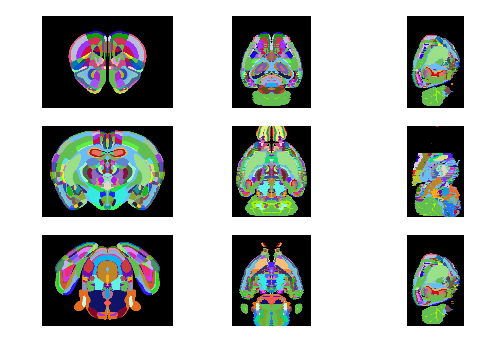

In [52]:
randValues = np.random.rand(1000,3)
randValues = np.concatenate(([[0,0,0]],randValues))
randCmap = matplotlib.colors.ListedColormap (randValues)
imgShow(refAnnoImg, vmax=1000, cmap=randCmap)

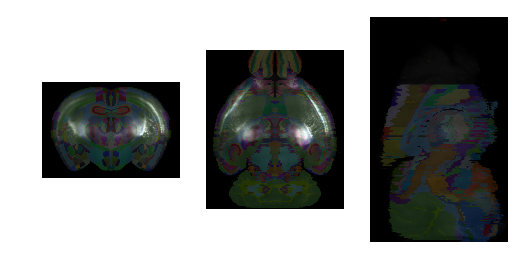

In [53]:
imgShow(inImg_lddmm, vmax=500, newFig=False, numSlices=1)
imgShow(refAnnoImg, vmax=1000, cmap=randCmap, alpha=0.2, newFig=False, numSlices=1)

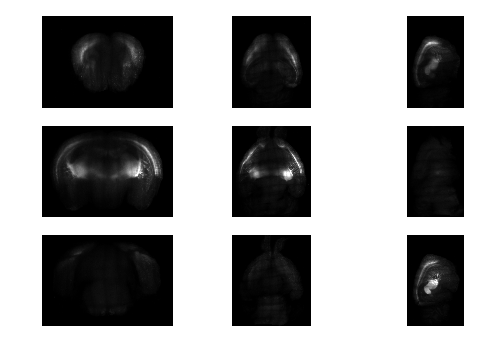

In [54]:
imgShow(inImg_lddmm, vmax = 500)

In [55]:
im = sitk.GetArrayFromImage(inImg_lddmm)
print(im.shape)

anno_im = sitk.GetArrayFromImage(refAnnoImg)
print(anno_im.shape)

(528, 320, 456)
(528, 320, 456)


In [51]:
print(im[200, 200, 200])
print(anno_im[200, 200, 200])

16
498


## Register function

In [7]:
def register(token, orientation, resolution=5):
    """ Saves fully registered brain as token + '_reg.nii'."""
    refToken = "ara_ccf2"
    refImg = imgDownload(refToken)

    refAnnoImg = imgDownload(refToken, channel="annotation")

    inImg = imgDownload(token, resolution=resolution)

    # resampling CLARITY image
    inImg = imgResample(inImg, spacing=refImg.GetSpacing())

    # reorienting CLARITY image
    inImg = imgReorient(inImg, orientation, "RSA")

    # Thresholding
    (values, bins) = np.histogram(sitk.GetArrayFromImage(inImg), bins=100, range=(0, 500))

    counts = np.bincount(values)
    maximum = np.argmax(bins)
    # print(maximum)
    # print(counts)

    lowerThreshold = maximum
    upperThreshold = sitk.GetArrayFromImage(inImg).max() + 1

    # print(lowerThreshold)
    # print(upperThreshold)

    inImg = sitk.Threshold(inImg, lowerThreshold, upperThreshold, lowerThreshold) - lowerThreshold

    # Generating CLARITY mask
    (values, bins) = np.histogram(sitk.GetArrayFromImage(inImg), bins=1000)
    cumValues = np.cumsum(values).astype(float)
    cumValues = (cumValues - cumValues.min()) / cumValues.ptp()

    maxIndex = np.argmax(cumValues > 0.95) - 1
    threshold = bins[maxIndex]

    inMask = sitk.BinaryThreshold(inImg, 0, threshold, 1, 0)

    # Affine Transformation
    spacing = [0.25, 0.25, 0.25]
    refImg_ds = imgResample(refImg, spacing=spacing)

    inImg_ds = imgResample(inImg, spacing=spacing)

    inMask_ds = imgResample(inMask, spacing=spacing, useNearest=True)

    affine = imgAffineComposite(inImg_ds, refImg_ds, inMask=inMask_ds, iterations=100, useMI=True, verbose=True)

    inImg_affine = imgApplyAffine(inImg, affine, size=refImg.GetSize())

    inMask_affine = imgApplyAffine(inMask, affine, size=refImg.GetSize(), useNearest=True)

    # LDDMM Registration
    inImg_ds = imgResample(inImg_affine, spacing=spacing)
    inMask_ds = imgResample(inMask_affine, spacing=spacing, useNearest=True)
    (field, invField) = imgMetamorphosisComposite(inImg_ds, refImg_ds, inMask=inMask_ds, alphaList=[0.05, 0.02, 0.01],
                                                  useMI=True, iterations=100, verbose=True)
    inImg_lddmm = imgApplyField(inImg_affine, field, size=refImg.GetSize())
    inMask_lddmm = imgApplyField(inMask_affine, field, size=refImg.GetSize(), useNearest=True)

    # Saving registered image
    location = "img/" + token + "_regis.nii"
    imgWrite(inImg_lddmm, str(location))

    # Saving annotations
    location = "img/" + token + "_anno.nii"
    imgWrite(refAnnoImg, str(location))

    return inImg_lddmm, refAnnoImg

In [8]:
register('Fear199', 'LAI', resolution=5)

IOError: Bad server response for http://openconnecto.me/ocp/ca/ara_ccf2/average/blosc/0/0,456/0,320/16,32/: 404: (2003, "Can't connect to MySQL server on 'dsp061.pha.jhu.edu' (111)")

## after Registration

(456, 320, 528)


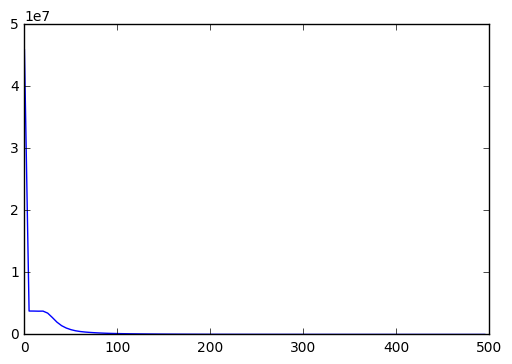

In [11]:
path = "img/" + 'Fear199_regi.nii'
real_im = nib.load(path)
real_im = real_im.get_data()

print(real_im.shape)

(values, bins) = np.histogram(real_im, bins=100, range=(0,500))
plt.plot(bins[:-1], values)

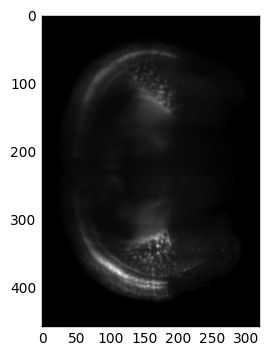

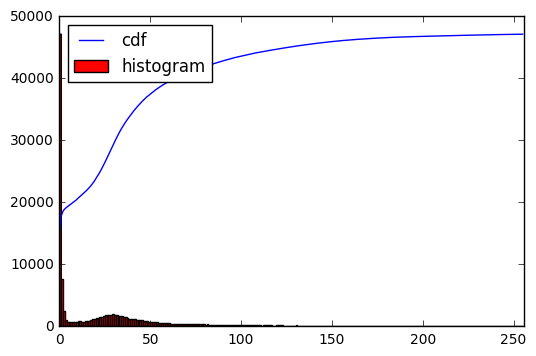

In [12]:
real_slice = real_im[:,:,250]

plt.imshow(real_slice, cmap='gray')
plt.show()

plot_hist(real_slice)

x_value = real_im.shape[0]
y_value = real_im.shape[1]
z_value = real_im.shape[2]

imgflat = real_im.reshape(-1)

In [13]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# img_grey = np.array(imgflat * 255, dtype = np.uint8)

img_grey = imgflat

cl1 = clahe.apply(img_grey)

newer_img = cl1.reshape(x_value, y_value, z_value)

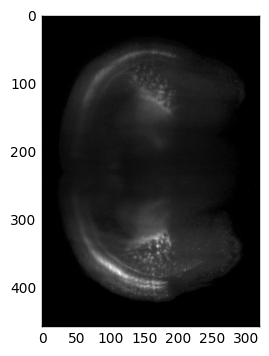

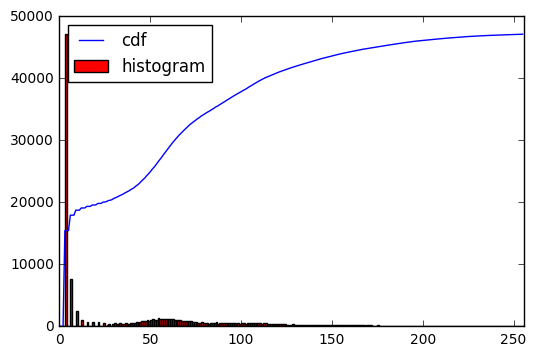

In [14]:
clahe_slice = newer_img[:,:,250]

plt.imshow(clahe_slice, cmap='gray')
plt.show()

plot_hist(clahe_slice)

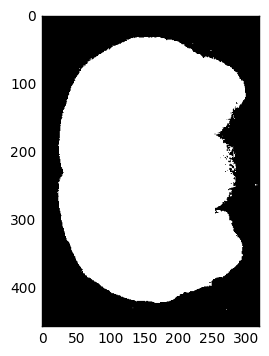

In [16]:
fear_t = thresh(newer_img, 20)

s = fear_t[:,:,250]

plt.imshow(s, cmap='gray')
plt.show()

37.136


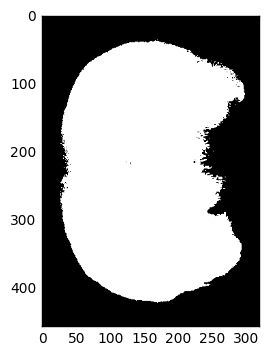

In [23]:
fear_t = thresh_cdf(newer_img, 0.40)

s = fear_t[:,:,250]

plt.imshow(s, cmap='gray')
plt.show()

32.116


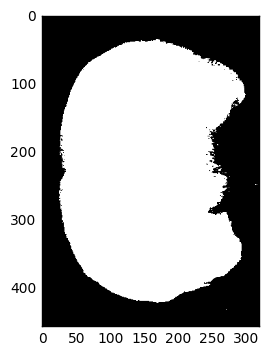

In [24]:
fear_t = thresh_cdf(newer_img, 0.35)

s = fear_t[:,:,250]

plt.imshow(s, cmap='gray')
plt.show()

19.064
num points above thresh: 30363123


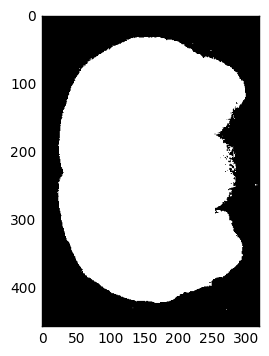

In [27]:
fear_t = thresh_cdf(newer_img, 0.25)

s = fear_t[:,:,250]

plt.imshow(s, cmap='gray')
plt.show()

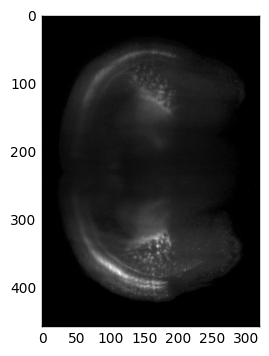

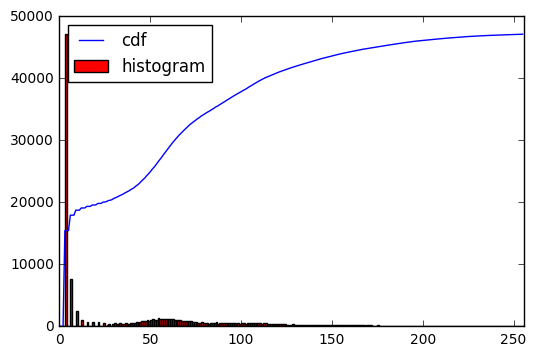

In [30]:
clahe_im = np.copy(newer_img)

clahe_slice = clahe_im[:,:,250]

plt.imshow(clahe_slice, cmap='gray')
plt.show()

plot_hist(clahe_slice)

## Downsampling

In [79]:
def downsample(im, num_points = 10000, optimize = True):
    """Method to extract points data from the img file."""
    # obtaining threshold
    percentile = 0.4
    (values, bins) = np.histogram(im, bins=1000)
    cumValues = np.cumsum(values).astype(float)
    cumValues = (cumValues - cumValues.min()) / cumValues.ptp()

    maxIndex = np.argmax(cumValues>percentile)-1
    threshold = bins[maxIndex]
    print(threshold)
    
    total = im.shape[0] * im.shape[1] * im.shape[2]
#     print("Coverting to points...\ntoken=%s\ntotal=%d\nmax=%f\nthreshold=%f\nnum_points=%d" \
#           %(self._token,total,self._max,threshold,num_points))
    print("(This will take couple minutes)")
    # threshold
    im_max = np.max(im)
    filt = im > threshold
    # a is just a container to hold another value for ValueError: too many values to unpack
    #x, y, z, a = np.where(filt)
    t = np.where(filt)
    x = t[0]
    y = t[1]
    z = t[2]
    v = im[filt]
#     if optimize:
#         self.discardImg()
#     v = np.int16(255 * (np.float32(v) / np.float32(self._max)))
    l = v.shape
    print("Above threshold=%d"%(l))
    # sample

    total_points = l[0]
    print('total points: %d' % total_points)

    if not 0 <= num_points <= total_points:
        raise ValueError("Number of points given should be at most equal to total points: %d" % total_points)
    fraction = num_points / float(total_points)

    if fraction < 1.0:
        # np.random.random returns random floats in the half-open interval [0.0, 1.0)
        filt = np.random.random(size=l) < fraction
        print('v.shape:')
        print(l)
#         print('x.size before downsample: %d' % x.size)
#         print('y.size before downsample: %d' % y.size)
#         print('z.size before downsample: %d' % z.size)
        print('v.size before downsample: %d' % v.size)
        x = x[filt]
        y = y[filt]
        z = z[filt]
        v = v[filt]
#         print('x.size after downsample: %d' % x.size)
#         print('y.size after downsample: %d' % y.size)
#         print('z.size after downsample: %d' % z.size)
        print('v.size after downsample: %d' % v.size)
    points = np.vstack([x,y,z,v])
    points = np.transpose(points)
    print("Output num points: %d"%(points.shape[0]))
    print("Finished")
    return points


In [43]:
def save_points(points, output_path):
    """Saves the points to a file.  Each point consists of [x, y, z, i] where i is the grayscale intensity"""
#     pathname = 'points/Fear199.csv"
    np.savetxt(output_path, points, fmt='%d', delimiter=',')

In [47]:
def generate_pointcloud(points_path, output_path, resolution):
    """Generates the plotly from the csv file."""
    # Type in the path to your csv file here
    thedata = None
    thedata = np.genfromtxt(points_path,
        delimiter=',', dtype='int', usecols = (0,1,2), names=['a','b','c'])

    # Set tupleResolution to resolution input parameter
    tupleResolution = resolution;

    # EG: for Aut1367, the spacing is (0.01872, 0.01872, 0.005).
    xResolution = tupleResolution[0]
    yResolution = tupleResolution[1]
    zResolution = tupleResolution[2]
    # Now, to get the mm image size, we can multiply all x, y, z
    # to get the proper mm size when plotting.

    trace1 = Scatter3d(
        x = [x * xResolution for x in thedata['a']],
        y = [x * yResolution for x in thedata['b']],
        z = [x * zResolution for x in thedata['c']],
        mode='markers',
        marker=dict(
            size=1.2,
            color='cyan',                # set color to an array/list of desired values
            colorscale='Viridis',   # choose a colorscale
            opacity=0.15
        )
    )

    data = [trace1]
    layout = Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        ),
        paper_bgcolor='rgb(0,0,0)',
        plot_bgcolor='rgb(0,0,0)'
    )

    fig = Figure(data=data, layout=layout)

    plotly.offline.plot(fig, filename=output_path)

#     plotly.offline.plot(fig, filename= 'output/' + self._token + "/" + self._token + "_brain_pointcloud.html")


In [80]:
im_points = downsample(clahe_im, num_points=10000)

37.136
(This will take couple minutes)
Above threshold=24373485
total points: 24373485
v.shape:
(24373485,)
v.size before downsample: 24373485
v.size after downsample: 9904
Output num points: 9904
Finished


In [81]:
save_points(im_points, 'Fear199_points.csv')

In [82]:
# obtained from doing inImg.getSpacing() for the originally downloaded clarity image
brain_res = (0.01872, 0.01872, 0.005) 
anno_res = (0.024999999999999998, 0.024999999999999998, 0.024999999999999998)
generate_pointcloud('Fear199_points.csv', 'Fear199_pointcloud.html', anno_res)

## Generating graphml

In [102]:
def csv_to_list(path):
    """Method for loading the initial csv file"""
    points = []
    with open(path, 'r') as infile:
        for line in infile:
            line = line.strip().split(',')
            entry = [int(line[0]), int(line[1]), int(line[2]), int(line[3])]
            points.append(entry)
            
#     points = np.array(points)
    return points

In [24]:
points = np.genfromtxt('Fear199_regions.csv', delimiter=',', dtype='int')
print(points)


[[ 36 162 267  48 755]
 [ 37 137 315  47 755]
 [ 38 115 303  43 251]
 ..., 
 [424 124 333  43 251]
 [424 162 339  40 836]
 [429 126 327  41 959]]


In [40]:
node = points[333]
# st = np.array2string(node, separator=',')
st = str(list(node))
print(st)

st = '(1, 2, 3, 4)'
st = str(st)
print(st)

print(ast.literal_eval(st))

[75, 226, 215, 58, 284]
(1, 2, 3, 4)
(1, 2, 3, 4)


In [8]:
def create_graph(points_path, radius=20, output_filename=None):
    """
    Function for creating networkx graph object using epsilon ball to find edges.  
    Saves to a .graphml if output_filename is specified.
    """
    points = np.genfromtxt(points_path, delimiter=',', dtype='int')
    
    g = nx.Graph()
    
    for i in range(len(points)):
#         if i % 3000 == 0:
#             print('ahhh: %d' % i)
        coordi = points[i][0:3]
        intensityi, regioni = points[i][3:5]
        # save node name as string because when loading from .graphml file, it's hard to load tuple names
        namei = str(list(coordi))
        g.add_node(namei)
        g.node[namei]['intensity'] = int(intensityi)
        g.node[namei]['region'] = int(regioni)
        g.node[namei]['coord'] = namei
        
        for j in range(i + 1, len(points)):
#             if j % 3000 == 0:
#                 print('ahhh: %d' % j)
            coordj = points[j][0:3]
            intensityj, regionj = points[j][3:5]
            namej = str(list(coordj))
            
            dist = np.linalg.norm(coordi - coordj)
            
            # if the distance is within the radius
            if dist < radius:
                g.add_node(namej)
                g.node[namej]['intensity'] = int(intensityj)
                g.node[namej]['region'] = int(regionj)
                g.node[namej]['coord'] = namej

                g.add_edge(namei, namej, weight=float(dist))
                
    print('finished creating graph, now about to save to graphml.')
                
    if output_filename != None:
        nx.write_graphml(g, output_filename)
        
    return g

In [8]:
def plot3d(points_path, output_filename, radius=20):
    """Method for plotting the Nodes and Edges"""
    
#     points = np.genfromtxt(points_path,
#         delimiter=',', dtype='int', usecols = (0,1,2), names=['a','b','c'])

    points = csv_to_list(points_path)

#     outpath = 'output/' + self._token + '/'
    nodename = output_filename + '_nodes.csv'
    edgename = output_filename + '_edges.csv'

    with open(nodename, 'w') as nodefile:
        with open(edgename, 'w') as edgefile:
            for ind in range(len(points)):
                temp = points[ind]
                x = temp[0]
                y = temp[1]
                z = temp[2]
                v = temp[3]
                # radius = 18
#                 radius = 25
                nodefile.write("s" + str(ind + 1) + "," + str(x) + "," + str(y) + "," + str(z) + "\n")
                for index in range(ind + 1, len(points)):
                    tmp = points[index]
                    distance = math.sqrt(math.pow(int(x) - int(tmp[0]), 2) + math.pow(int(y) - int(tmp[1]), 2) + math.pow(int(z) - int(tmp[2]), 2))
                    if distance < radius:
                            edgefile.write("s" + str(ind + 1) + "," + "s" + str(index + 1) + "\n")

In [106]:
def generate_graphml(nodefile_path, edgefile_path, output_path):
    """
    Method for extracting the data to a graphml file, based on the node and edge files.  
    Example outfile_path: Fear199.graphml
    """
    nodes = []
    with open(nodefile_path, 'r') as infile:
        for line in infile:
            line = line.strip().split(',')
            entry = [line[0], line[1], line[2], line[3]]
            nodes.append(entry)
    
    edges = []
    with open(edgefile_path, 'r') as infile:
        for line in infile:
            line = line.strip().split(',')
            entry = [line[0], line[1]]
            edges.append(entry)
            
    # Start writing to the output graphml file
    with open(output_path, 'w') as outfile:
        outfile.write("<?xml version=\"1.0\" encoding=\"UTF-8\"?>\n")
        outfile.write("<graphml xmlns=\"http://graphml.graphdrawing.org/xmlns\"\n")
        outfile.write("         xmlns:xsi=\"http://www.w3.org/2001/XMLSchema-instance\"\n")
        outfile.write("         xsi:schemaLocation=\"http://graphml.graphdrawing.org/xmlns\n")
        outfile.write("         http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd\">\n")

        outfile.write("  <key id=\"d0\" for=\"node\" attr.name=\"attr\" attr.type=\"string\"/>\n")
        outfile.write("  <key id=\"e_weight\" for=\"edge\" attr.name=\"weight\" attr.type=\"double\"/>\n")
        outfile.write("  <graph id=\"G\" edgedefault=\"undirected\">\n")

        for line in nodes:
#              if len(line) == 0:
#                  continue
             outfile.write("    <node id=\"" + line[0] + "\">\n")
             outfile.write("      <data key=\"d0\">[" + line[1] + ", " + line[2] + ", " + line[3] +"]</data>\n")
             outfile.write("    </node>\n")

        for line in edges:
#              if len(line) == 0:
#                  continue
             outfile.write("    <edge source=\"" + line[0] + "\" target=\"" + line[1] + "\">\n")
             outfile.write("      <data key=\"e_weight\">1</data>\n")
             outfile.write("    </edge>\n")

        outfile.write("  </graph>\n</graphml>")


In [96]:
plot3d('Fear199_points.csv', 'Fear199', radius=20)

In [108]:
start = time.time()
generate_graphml('Fear199_nodes.csv', 'Fear199_edges.csv', 'Fear199.graphml')
run_time = time.time() - start
print('run time: %f' % run_time)

run time: 0.114961


## Getting the regions

In [ ]:
def csv_to_list2(path):
    """Method for loading the initial csv file"""
    points = []
    with open(path, 'r') as infile:
        for line in infile:
            line = line.strip().split(',')
            entry = [line[0], line[1], int(line[2]), int(line[3])]
            points.append(entry)
            
#     points = np.array(points)
    return points

In [9]:
def get_regions(points_path, anno_path, output_path):
    """
    points_path is a .csv
    anno_path is a .nii
    output_path is a .csv (e.g. Fear199_regions.csv)
    """
    atlas = nib.load(anno_path)  # <- atlas .nii image
    atlas_data = atlas.get_data()

    points = np.genfromtxt(points_path, delimiter=',')

    locations = points[:, 0:3]
    
    # getting the region numbers
    regions = [atlas_data[l[0], l[1], l[2]] for l in locations]

    outfile = open(output_path, 'w')
    infile = open(points_path, 'r')
    for i, line in enumerate(infile):
        line = line.strip().split(',')
        outfile.write(",".join(line) + "," + str(regions[i]) + "\n")    # adding a 5th column to the original csv indicating its region (integer)
    infile.close()
    outfile.close()

    print len(regions)
#     print regions[0:10]
    uniq = list(set(regions))
    numRegions = len(uniq)
    print ('num unique regions: %d' % len(uniq))
    print uniq
    
    p = np.genfromtxt(output_path, delimiter=',')
    return p

#     # newToken = Token + '.region'
#     atlas = atlasregiongraph(Token)
    
#     atlas.generate_atlas_region_graph(tupleResolution, None, numRegions)

In [116]:
rp = get_regions('Fear199_points.csv', 'img/Fear199_anno.nii', 'Fear199_regions.csv')
print(rp)

9904
num unique regions: 578
[0, 2, 7, 8, 9, 10, 12, 15, 17, 19, 20, 23, 26, 27, 28, 33, 36, 41, 42, 45, 50, 52, 53, 55, 56, 59, 60, 61, 64, 68, 69, 74, 77, 82, 83, 84, 87, 91, 92, 96, 99, 101, 105, 106, 113, 114, 115, 118, 120, 121, 122, 123, 128, 130, 131, 132, 133, 135, 136, 137, 139, 10723, 146, 148, 149, 151, 155, 156, 159, 160, 162, 163, 167, 169, 170, 171, 175, 178, 180, 181, 183, 186, 187, 188, 189, 191, 192, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 206, 209, 211, 212, 214, 215, 216, 217, 218, 220, 222, 224, 225, 226, 228, 231, 232, 233, 234, 236, 238, 240, 241, 243, 244, 246, 248, 250, 251, 252, 255, 256, 257, 258, 260, 262, 266, 267, 268, 269, 271, 274, 276, 278, 279, 281, 284, 288, 289, 291, 292, 296, 298, 303, 304, 305, 307, 308, 310, 311, 312, 313, 314, 320, 321, 325, 327, 328, 330, 333, 334, 335, 338, 340, 342, 344, 354, 358, 360, 363, 364, 366, 368, 374, 377, 381, 391, 399, 401, 407, 408, 411, 412, 414, 415, 416, 418, 421, 422, 424, 427, 429, 430, 431, 10672, 43

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



In [10]:
pts = np.genfromtxt('Fear199_regions.csv', delimiter=',')
print(pts)

[[  36.  162.  267.   48.  755.]
 [  37.  137.  315.   47.  755.]
 [  38.  115.  303.   43.  251.]
 ..., 
 [ 424.  124.  333.   43.  251.]
 [ 424.  162.  339.   40.  836.]
 [ 429.  126.  327.   41.  959.]]


In [111]:
p = np.genfromtxt('Fear199_points.csv', delimiter=',')
print(p)

[[  36.  162.  267.   48.]
 [  37.  137.  315.   47.]
 [  38.  115.  303.   43.]
 ..., 
 [ 424.  124.  333.   43.]
 [ 424.  162.  339.   40.]
 [ 429.  126.  327.   41.]]


# Creating networkx graph and saving .graphml

In [44]:
# fear199_graph = create_graph('Fear199_regions.csv', radius=20, output_filename='Fear199.graphml')
fear199_graph = time_function(create_graph, 'Fear199_regions.csv', 20, 'Fear199.graphml')

finished creating graph, now about to save to graphml.
run time: 681.467845 s


In [9]:
# Testing new
test = time_function(create_graph, 'Fear199_regions.csv', 20, 'test.graphml')

finished creating graph, now about to save to graphml.
run time: 626.737331 s


In [48]:
a = nx.get_node_attributes(fear199_graph, 'region')

In [49]:
print(a)

{(52, 332): 1046, (91, 238): 296, (54, 278): 274, (81, 414): 0, (152, 282): 1023, (209, 287): 131, (119, 308): 504, (194, 237): 1022, (195, 348): 715, (214, 232): 672, (52, 243): 648, (114, 404): 727, (132, 331): 511, (81, 357): 10698, (100, 199): 8, (137, 91): 969, (199, 269): 952, (204, 101): 183, (155, 363): 632, (265, 511): 1107, (85, 230): 296, (213, 401): 146, (90, 332): 600, (218, 313): 749, (126, 272): 862, (203, 167): 56, (41, 256): 767, (114, 374): 10696, (191, 462): 10689, (51, 347): 430, (131, 275): 575, (188, 320): 797, (99, 103): 962, (62, 377): 430, (155, 393): 795, (193, 254): 1031, (194, 337): 214, (51, 200): 943, (94, 174): 844, (169, 117): 582, (99, 244): 672, (127, 290): 218, (112, 121): 1021, (203, 274): 685, (95, 256): 495, (197, 304): 131, (108, 141): 648, (221, 426): 1093, (121, 110): 582, (212, 147): 8, (175, 265): 262, (144, 211): 258, (112, 295): 156, (187, 343): 374, (154, 20): 220, (121, 223): 672, (175, 510): 10686, (70, 224): 1128, (292, 186): 458, (64, 2

In [37]:
def plot_graphml3d_new(g, show=False, output_path=None):
    """
    Plotting networkx graph.  output_path should end in '.html'.
    """
    # grab the node positions from the graphML file
    V = nx.number_of_nodes(g)
    attributes = nx.get_node_attributes(g, 'coord')
#     nodes = g.nodes()
    node_positions_3d = pd.DataFrame(columns=['x', 'y', 'z'], index=range(V))
    i = 0
    for key, val in enumerate(attributes):
        n = ast.literal_eval(val)
        node_positions_3d.loc[i] = [int(n[0]), int(n[1]), int(n[2])]
        i += 1

    # grab edge endpoints
    edge_x = []
    edge_y = []
    edge_z = []
    
    for e in g.edges():
        # Changing tuple to list
        source_pos = ast.literal_eval(g.node[e[0]]['coord'])
        target_pos = ast.literal_eval(g.node[e[1]]['coord'])

        edge_x += [source_pos[0], target_pos[0], None]
        edge_y += [source_pos[1], target_pos[1], None]
        edge_z += [source_pos[2], target_pos[2], None]

    # node style
    node_trace = Scatter3d(x=[x for x in node_positions_3d['x']],
                           y=[x for x in node_positions_3d['y']],
                           z=[x for x in node_positions_3d['z']],
                           mode='markers',
                           # name='regions',
                           marker=Marker(symbol='dot',
                                         size=6,
                                         opacity=0.5,
                                         color='purple'),
                           # text=[str(r) for r in range(V)],
                           # text=atlas_data['nodes'],
                           hoverinfo='text')

    # edge style
    edge_trace = Scatter3d(x=edge_x,
                           y=edge_y,
                           z=edge_z,
                           mode='lines',
                           line=Line(color='cyan', width=1),
                           hoverinfo='none')

    # axis style
    axis = dict(showbackground=False,
                showline=False,
                zeroline=False,
                showgrid=False,
                showticklabels=False)

    plot_title = 'graphml plot'
    # overall layout
    layout = Layout(title=plot_title,
                    width=800,
                    height=900,
                    showlegend=False,
                    scene=Scene(xaxis=XAxis(axis),
                                yaxis=YAxis(axis),
                                zaxis=ZAxis(axis)),
                    margin=Margin(t=50),
                    hovermode='closest',
                    paper_bgcolor='rgba(0,0,0,0)',
                    plot_bgcolor='rgb(255,255,255)')

    data = Data([node_trace, edge_trace])
    fig = Figure(data=data, layout=layout)
    if show:
        iplot(fig, validate=False)
    
    if output_path != None:
        plotly.offline.plot(fig, filename=output_path)

In [98]:
plot_graphml3d(fear199_graph, show=False, output_path='Fear199_graph.html')

In [38]:
plot_graphml3d_new(test, show=False, output_path='test.html')

# Running on Aut1379

## Downsampling testing

In [55]:
# obtaining threshold
im_t = np.copy(clahe_im)
percentile = 0.4

(values, bins) = np.histogram(im_t, bins=1000)
cumValues = np.cumsum(values).astype(float)
cumValues = (cumValues - cumValues.min()) / cumValues.ptp()

maxIndex = np.argmax(cumValues>percentile)-1
threshold = bins[maxIndex]
print(threshold)

37.136


In [78]:
im = np.copy(clahe_im)
               
num_points = 7000

"""Method to extract points data from the img file."""
# threshold = .6
total = im.shape[0] * im.shape[1] * im.shape[2]
#     print("Coverting to points...\ntoken=%s\ntotal=%d\nmax=%f\nthreshold=%f\nnum_points=%d" \
#           %(self._token,total,self._max,threshold,num_points))
print("(This will take couple minutes)")
# threshold
im_max = np.max(im)
# filt = im > threshold * im_max
filt = im > threshold
# a is just a container to hold another value for ValueError: too many values to unpack
#x, y, z, a = np.where(filt)
t = np.where(filt)
x = t[0]
y = t[1]
z = t[2]
v = im[filt]
#     if optimize:
#         self.discardImg()
#     v = np.int16(255 * (np.float32(v) / np.float32(self._max)))
l = v.shape
print("Above threshold=%d"%(l))
# sample

total_points = l[0]
print('total points: %d' % total_points)

if not 0 <= num_points <= total_points:
    raise ValueError("Number of points given should be at most equal to total points: %d" % total_points)
fraction = num_points / float(total_points)

if fraction < 1.0:
    # np.random.random returns random floats in the half-open interval [0.0, 1.0)
    filt = np.random.random(size=l) < fraction
    print('v.shape:')
    print(l)
#     print('x.size before downsample: %d' % x.size)
#     print('y.size before downsample: %d' % y.size)
#     print('z.size before downsample: %d' % z.size)
    print('v.size before downsample: %d' % v.size)
    x = x[filt]
    y = y[filt]
    z = z[filt]
    v = v[filt]
#     print('x.size after downsample: %d' % x.size)
#     print('y.size after downsample: %d' % y.size)
#     print('z.size after downsample: %d' % z.size)
    print('v.size after downsample: %d' % v.size)
points = np.vstack([x,y,z,v])
points = np.transpose(points)
print("Output num points: %d"%(points.shape[0]))
print("Finished")

(This will take couple minutes)
Above threshold=24373485
total points: 24373485
v.shape:
(24373485,)
v.size before downsample: 24373485
v.size after downsample: 7005
Output num points: 7005
Finished


In [59]:
save_points(points, 'Fear199_points_test.csv')

In [60]:
res = (0.01872, 0.01872, 0.005) # obtained from doing inImg.getSpacing() for the originally downloaded clarity image
generate_pointcloud('Fear199_points_test.csv', 'Fear199_pointcloud_test.html', res)

In [53]:
print(np.max(clahe_im))

1007


# Miscellaneous

In [122]:
test = nx.read_graphml('Fear199.graphml', node_type=str)
print(test.nodes())

['(222, 177, 395)', '(364, 271, 270)', '(183, 168, 83)', '(175, 238, 84)', '(134, 84, 330)', '(339, 231, 437)', '(207, 185, 275)', '(167, 177, 242)', '(192, 173, 138)', '(38, 115, 303)', '(106, 140, 207)', '(394, 95, 323)', '(286, 217, 315)', '(235, 136, 118)', '(290, 22, 284)', '(282, 149, 233)', '(123, 219, 257)', '(105, 201, 287)', '(116, 47, 230)', '(152, 108, 349)', '(76, 178, 308)', '(108, 60, 379)', '(110, 93, 402)', '(250, 191, 174)', '(258, 180, 20)', '(234, 121, 444)', '(153, 210, 326)', '(242, 169, 194)', '(241, 165, 122)', '(272, 211, 388)', '(302, 252, 180)', '(165, 176, 52)', '(161, 228, 57)', '(247, 226, 509)', '(76, 190, 257)', '(238, 153, 348)', '(297, 261, 467)', '(65, 75, 348)', '(276, 105, 396)', '(310, 193, 157)', '(186, 101, 288)', '(262, 259, 144)', '(202, 226, 123)', '(302, 217, 278)', '(275, 169, 447)', '(183, 172, 324)', '(197, 35, 291)', '(261, 142, 269)', '(245, 169, 117)', '(299, 149, 287)', '(396, 127, 327)', '(101, 157, 145)', '(280, 79, 116)', '(139, 123

In [104]:
print(test.edges())

[('(222, 177, 395)', '(217, 176, 389)'), ('(222, 177, 395)', '(216, 183, 397)'), ('(222, 177, 395)', '(235, 166, 401)'), ('(222, 177, 395)', '(236, 179, 395)'), ('(222, 177, 395)', '(235, 172, 386)'), ('(222, 177, 395)', '(232, 189, 397)'), ('(222, 177, 395)', '(217, 176, 414)'), ('(222, 177, 395)', '(233, 173, 381)'), ('(364, 271, 270)', '(370, 264, 281)'), ('(364, 271, 270)', '(364, 286, 261)'), ('(364, 271, 270)', '(359, 279, 277)'), ('(364, 271, 270)', '(370, 255, 274)'), ('(364, 271, 270)', '(355, 278, 261)'), ('(364, 271, 270)', '(351, 266, 273)'), ('(364, 271, 270)', '(371, 264, 284)'), ('(364, 271, 270)', '(353, 275, 260)'), ('(364, 271, 270)', '(357, 259, 264)'), ('(364, 271, 270)', '(360, 289, 276)'), ('(364, 271, 270)', '(371, 261, 258)'), ('(364, 271, 270)', '(356, 266, 285)'), ('(364, 271, 270)', '(345, 272, 274)'), ('(364, 271, 270)', '(362, 280, 262)'), ('(183, 168, 83)', '(197, 159, 91)'), ('(183, 168, 83)', '(179, 166, 100)'), ('(183, 168, 83)', '(173, 180, 78)'), ('(1

In [106]:
print(test.edges('(222, 177, 395)'))

[('(222, 177, 395)', '(217, 176, 389)'), ('(222, 177, 395)', '(216, 183, 397)'), ('(222, 177, 395)', '(235, 166, 401)'), ('(222, 177, 395)', '(236, 179, 395)'), ('(222, 177, 395)', '(235, 172, 386)'), ('(222, 177, 395)', '(232, 189, 397)'), ('(222, 177, 395)', '(217, 176, 414)'), ('(222, 177, 395)', '(233, 173, 381)')]


In [107]:
print(fear199_graph.edges())

[((308, 247, 497), (310, 253, 511)), ((308, 247, 497), (319, 250, 497)), ((308, 247, 497), (295, 257, 487)), ((308, 247, 497), (292, 238, 490)), ((308, 247, 497), (298, 256, 504)), ((308, 247, 497), (304, 249, 496)), ((308, 247, 497), (303, 231, 500)), ((308, 247, 497), (315, 250, 505)), ((308, 247, 497), (302, 259, 502)), ((308, 247, 497), (304, 233, 509)), ((352, 159, 171), (341, 168, 160)), ((352, 159, 171), (365, 168, 179)), ((352, 159, 171), (360, 145, 179)), ((352, 159, 171), (361, 143, 177)), ((352, 159, 171), (350, 153, 171)), ((352, 159, 171), (350, 146, 176)), ((352, 159, 171), (343, 150, 156)), ((352, 159, 171), (342, 166, 159)), ((352, 159, 171), (351, 165, 182)), ((352, 159, 171), (342, 148, 173)), ((352, 159, 171), (344, 152, 180)), ((352, 159, 171), (347, 166, 180)), ((352, 159, 171), (335, 159, 177)), ((352, 159, 171), (356, 177, 169)), ((212, 272, 401), (212, 277, 402)), ((212, 272, 401), (217, 270, 396)), ((212, 272, 401), (215, 278, 398)), ((212, 272, 401), (211, 262

In [114]:
node = fear199_graph.nodes()[0]
print type(node)
print fear199_graph.node[node]['region']

<type 'tuple'>
437


In [113]:
node = test.nodes()[0]
print node
print type(test.node[node]['region'])

(222, 177, 395)
<type 'int'>
